<a href="https://colab.research.google.com/github/AnandGourishankar/EPHTrackR/blob/master/Bronchioilits_allmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Install package dependencies**

In [ ]:
!pip install autogluon

**2. Import packkage**

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(913)

**2. Add dataset**

In [ ]:
df=pd.read_csv('/content/Colab_data_bronchiolitis_pecarn.csv')

In [ ]:
df.head()

,received_tx,season,ageindays,male,race,famasthma,eczema,smoker,pets,daysill,...,tempdegc4,viralresults,xrayresults,anyadmit,racs_4,delta_rdai_4,delta_resp_4,delta_sat_4,delta_hr_4,delta_tempc_4
0,PLACEBO,1,271,1,NaN,1.0,1.0,0.0,0.0,2.0,...,NaN,Negative,Cosistent with bronchiolitis,1,3.0,0.0,18.0,4.0,-21.0,NaN
1,DRUG,1,135,1,Asian,0.0,0.0,0.0,0.0,1.0,...,37.1,Negative,Cosistent with bronchiolitis,0,-9.0,-6.0,-16.0,3.0,-55.0,-1.8
2,DRUG,1,232,1,White,0.0,0.0,0.0,0.0,3.0,...,NaN,Not Done,Cosistent with bronchiolitis,0,3.0,-6.0,26.0,-5.0,-4.0,NaN
3,DRUG,1,140,1,NaN,0.0,0.0,0.0,0.0,2.0,...,37.1,Positive: RSV,Normal,0,-7.0,-3.0,-22.0,0.0,-48.0,-1.6
4,DRUG,2,107,0,Other,0.0,1.0,0.0,0.0,3.0,...,NaN,Negative,Lobar or segmental infiltrate specifically men...,0,-2.0,-3.0,3.0,1.0,-17.0,NaN


In [ ]:
# data (as pandas dataframes)
y=df['anyadmit']
x=df.drop(columns=['anyadmit'])

In [ ]:
df['anyadmit'].value_counts()

,count
anyadmit,
0,362
1,246


In [ ]:
# Re-split data to ensure consistency with current df
bl_train = df.sample(frac=0.8, random_state=913)
bl_test = df.drop(bl_train.index)

# Define binary and categorical columns
binary_categorical_cols = ['male', 'famasthma', 'eczema', 'smoker', 'pets', 'albused', 'albcont', 'epiused', 'O2SUPP', 'virodone', 'xraydone']
multi_category_cols = ['season']
all_categorical_cols = binary_categorical_cols + multi_category_cols

# Convert specified columns to 'category' data type in both train and test sets
for col in all_categorical_cols:
    if col in bl_train.columns:
        bl_train[col] = bl_train[col].astype('category')
    if col in bl_test.columns:
        bl_test[col] = bl_test[col].astype('category')

# Ensure the target variable 'anyadmit' is also treated as categorical (binary)
bl_train['anyadmit'] = bl_train['anyadmit'].astype('category')
bl_test['anyadmit'] = bl_test['anyadmit'].astype('category')

print("Data types after conversion for bl_train:")
print(bl_train[all_categorical_cols + ['anyadmit']].dtypes)
print("\nData types after conversion for bl_test:")
print(bl_test[all_categorical_cols + ['anyadmit']].dtypes)

Data types after conversion for bl_train:
male         category
famasthma    category
eczema       category
smoker       category
pets         category
albused      category
albcont      category
epiused      category
O2SUPP       category
virodone     category
xraydone     category
season       category
anyadmit     category
dtype: object

Data types after conversion for bl_test:
male         category
famasthma    category
eczema       category
smoker       category
pets         category
albused      category
albcont      category
epiused      category
O2SUPP       category
virodone     category
xraydone     category
season       category
anyadmit     category
dtype: object


In [ ]:
from autogluon.tabular import TabularPredictor

predictor_bl = TabularPredictor( # construct the predictor
    label='anyadmit', eval_metric='roc_auc'
).fit( # call the fit method
    bl_train,
    num_bag_folds=3
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20260220_034125"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Pytorch Version:    2.9.1+cu128
CUDA Version:       CUDA is not available
Memory Avail:       9.65 GB / 12.67 GB (76.1%)
Disk Space Avail:   192.86 GB / 225.83 GB (85.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme'  : New in v1.5: The state-of-the-art for tabular data. Massively better than 'best' on datasets <100000 samples by using new Tabular Foundation Models (TFMs) meta-learned on https://tabarena.

In [ ]:
# Now we evaluate the Bronchiolitis model on the test data
predictor_bl.evaluate(bl_test)

{'roc_auc': np.float64(0.8633928571428572),
 'accuracy': 0.7786885245901639,
 'balanced_accuracy': np.float64(0.7690476190476191),
 'mcc': np.float64(0.525350592961653),
 'f1': 0.6966292134831461,
 'precision': 0.6595744680851063,
 'recall': 0.7380952380952381}

In [ ]:
# Output summary of information about models produced during fit() as a pd.DataFrame. Includes information on test and validation scores for all models, model training times, inference times, and stack levels
predictor_bl.leaderboard(bl_test)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesGini_BAG_L1,0.870833,0.862093,roc_auc,0.107230,0.177238,1.004970,0.107230,0.177238,1.004970,1,True,6
1,RandomForestEntr_BAG_L1,0.870536,0.859599,roc_auc,0.102486,0.229163,1.412271,0.102486,0.229163,1.412271,1,True,4
2,RandomForestGini_BAG_L1,0.868006,0.859051,roc_auc,0.097686,0.296064,1.079419,0.097686,0.296064,1.079419,1,True,3
3,ExtraTreesEntr_BAG_L1,0.866518,0.861528,roc_auc,0.105850,0.136863,0.739018,0.105850,0.136863,0.739018,1,True,7
4,LightGBMXT_BAG_L1,0.864286,0.856904,roc_auc,0.024109,0.040149,6.882486,0.024109,0.040149,6.882486,1,True,1
5,XGBoost_BAG_L1,0.864286,0.828996,roc_auc,0.046281,0.038249,6.231287,0.046281,0.038249,6.231287,1,True,9
6,WeightedEnsemble_L2,0.863393,0.871645,roc_auc,0.403487,0.709889,71.831538,0.003451,0.000549,0.065909,2,True,12
7,CatBoost_BAG_L1,0.859821,0.859703,roc_auc,0.015790,0.056754,17.150008,0.015790,0.056754,17.150008,1,True,5
8,LightGBM_BAG_L1,0.856250,0.846666,roc_auc,0.021500,0.098616,6.260606,0.021500,0.098616,6.260606,1,True,2
9,LightGBMLarge_BAG_L1,0.846429,0.810040,roc_auc,0.030097,0.026653,9.793324,0.030097,0.026653,9.793324,1,True,11


In [ ]:
leaderboard_df = predictor_bl.leaderboard(bl_test)
print("Leaderboard retrieved:")
print(leaderboard_df.head())

Leaderboard retrieved:
                     model  score_test  score_val eval_metric  pred_time_test  \
0    ExtraTreesGini_BAG_L1    0.870833   0.862093     roc_auc        0.103764   
1  RandomForestEntr_BAG_L1    0.870536   0.859599     roc_auc        0.092315   
2  RandomForestGini_BAG_L1    0.868006   0.859051     roc_auc        0.112123   
3    ExtraTreesEntr_BAG_L1    0.866518   0.861528     roc_auc        0.123391   
4        LightGBMXT_BAG_L1    0.864286   0.856904     roc_auc        0.028066   

   pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       0.177238  1.004970                 0.103764                0.177238   
1       0.229163  1.412271                 0.092315                0.229163   
2       0.296064  1.079419                 0.112123                0.296064   
3       0.136863  0.739018                 0.123391                0.136863   
4       0.040149  6.882486                 0.028066                0.040149   

   fit_time_mar

In [ ]:
feature_importance = predictor_bl.feature_importance(data=bl_test, model=second_best_model_name)
print("Feature Importance for the second best model:")
print(feature_importance.head())

Computing feature importance via permutation shuffling for 40 features using 122 rows with 5 shuffle sets...
	23.41s	= Expected runtime (4.68s per shuffle set)
	1.11s	= Actual runtime (Completed 5 of 5 shuffle sets)


Feature Importance for the second best model:
              importance    stddev   p_value  n  p99_high   p99_low
O2SUPP          0.031071  0.009479  0.000922  5  0.050588  0.011555
virodone        0.029970  0.009252  0.000964  5  0.049021  0.010920
rdai4           0.024524  0.010531  0.003242  5  0.046206  0.002841
viralresults    0.012887  0.006421  0.005462  5  0.026108 -0.000334
airsat4         0.011399  0.005295  0.004282  5  0.022302  0.000496


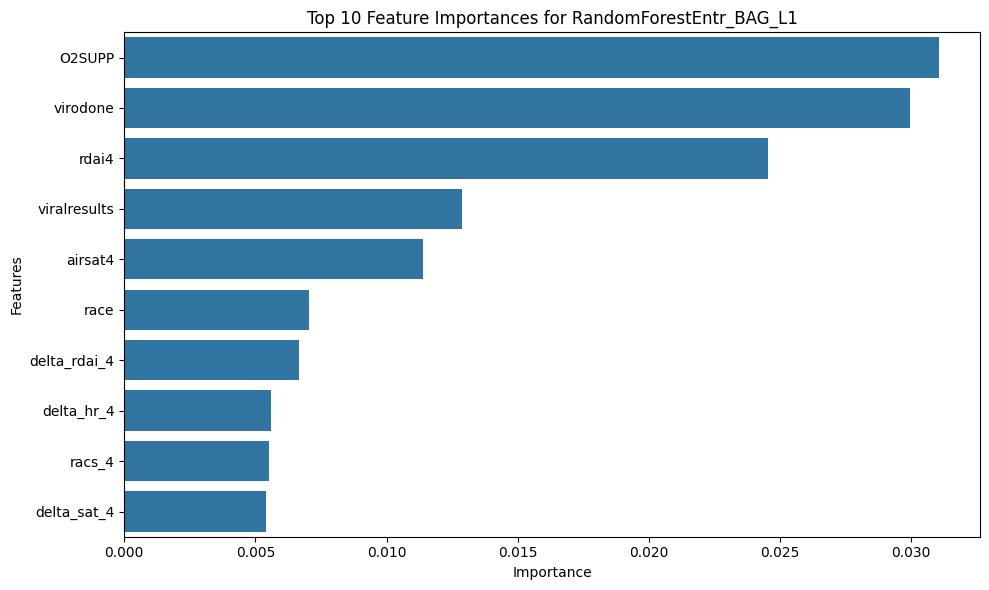

Top features by importance:
              importance    stddev   p_value  n  p99_high   p99_low
O2SUPP          0.031071  0.009479  0.000922  5  0.050588  0.011555
virodone        0.029970  0.009252  0.000964  5  0.049021  0.010920
rdai4           0.024524  0.010531  0.003242  5  0.046206  0.002841
viralresults    0.012887  0.006421  0.005462  5  0.026108 -0.000334
airsat4         0.011399  0.005295  0.004282  5  0.022302  0.000496
race            0.007024  0.001904  0.000589  5  0.010944  0.003104
delta_rdai_4    0.006667  0.003790  0.008529  5  0.014471 -0.001137
delta_hr_4      0.005595  0.002516  0.003817  5  0.010775  0.000415
racs_4          0.005536  0.006235  0.059049  5  0.018374 -0.007303
delta_sat_4     0.005387  0.001956  0.001763  5  0.009413  0.001360


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort feature importance by 'importance' in descending order
feature_importance_sorted = feature_importance.sort_values(by='importance', ascending=False)

# Select top N features for visualization
top_n = 10  # You can adjust this number as needed
top_features = feature_importance_sorted.head(top_n)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=top_features.index, data=top_features)
plt.title(f'Top {top_n} Feature Importances for {second_best_model_name}')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("Top features by importance:")
print(top_features)

### Summary of Key Feature Importances

Based on the feature importance analysis for the `RandomForestEntr_BAG_L1` model, the following features are the most influential in predicting `anyadmit` (any admission):

1.  **O2SUPP**: This feature, likely indicating oxygen support, has the highest importance, suggesting it is a strong predictor of admission.
2.  **virodone**: This feature, possibly related to antiviral treatment or a specific medical intervention, is also highly influential.
3.  **rdai4**: This feature, potentially a respiratory distress assessment score at a specific time point, is another significant predictor.
4.  **viralresults**: The results of viral tests are important, indicating the impact of specific viral infections on admission.
5.  **airsat4**: Air saturation levels at a specific time point also play a role in predicting admissions.
6.  **race**: Patient's race shows moderate importance, suggesting potential demographic influences on admission.
7.  **delta_rdai_4**: Change in respiratory distress assessment score also contributes to the prediction.
8.  **delta_hr_4**: Change in heart rate is another notable factor.
9.  **racs_4**: This feature (possibly a respiratory assessment clinical score) at a specific time point shows some importance.
10. **delta_sat_4**: Change in oxygen saturation also has predictive power.

These findings highlight the critical role of respiratory status indicators (O2SUPP, rdai4, airsat4, delta_rdai_4, delta_sat_4, racs_4), viral infection status (viralresults), and medical interventions (virodone) in predicting hospital admissions for bronchiolitis. Demographic factors like race also contribute to the model's predictive power.

## Final Task

### Subtask:
Provide a summary of the extracted feature importance, highlighting the most significant features of the second best model.


## Summary:

### Q&A
The second best model is "RandomForestEntr\_BAG\_L1". Its feature importance highlights that respiratory status indicators, viral infection status, and medical interventions are critical predictors for hospital admissions, with demographic factors like race also contributing. Specifically, the top three most significant features are `O2SUPP`, `virodone`, and `rdai4`.

### Data Analysis Key Findings
*   The second best model identified from the leaderboard, based on `score_test`, is "RandomForestEntr\_BAG\_L1".
*   The top three most important features for the "RandomForestEntr\_BAG\_L1" model are:
    *   `O2SUPP` with an importance of 0.031071.
    *   `virodone` with an importance of 0.029970.
    *   `rdai4` with an importance of 0.024524.
*   Other significant features include `viralresults`, `airsat4`, and `race`, indicating the diverse factors influencing predictions.
*   The key categories of influential features include respiratory status indicators (e.g., `O2SUPP`, `rdai4`, `airsat4`, `delta_rdai_4`, `delta_sat_4`, `racs_4`), viral infection status (`viralresults`), medical interventions (`virodone`), and demographic factors (`race`).

### Insights or Next Steps
*   Further investigation into the `O2SUPP`, `virodone`, and `rdai4` features could provide deeper clinical understanding and potentially inform intervention strategies for bronchiolitis.
*   Given the importance of `race`, a deeper analysis into potential disparities or confounding factors linked to race and admission outcomes might be warranted to ensure equitable care.


In [ ]:
pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# The model object loaded is a StackerEnsembleModel, which TreeExplainer does not support directly.
# We need to use KernelExplainer for ensemble models or models not directly compatible with TreeExplainer.
# Define a wrapper for AutoGluon's predict_proba function that KernelExplainer can use.
# KernelExplainer passes numpy arrays, so we need to convert them back to pandas DataFrames with original column names and dtypes.

def ag_predict_proba(X_input):
    # Ensure X_input is a DataFrame with original column names and dtypes
    X_df = pd.DataFrame(X_input, columns=X_test.columns)
    # Re-apply categorical dtypes as Autogluon expects them
    for col in all_categorical_cols: # 'all_categorical_cols' is available in the notebook state
        if col in X_df.columns:
            X_df[col] = X_df[col].astype('category')
    return predictor_bl.predict_proba(X_df).values # Return numpy array of probabilities

# Prepare the test data (features only)
X_test = bl_test.drop(columns=[predictor_bl.label])

# Prepare a background dataset for KernelExplainer by sampling from training data features.
# This is crucial for KernelExplainer to estimate feature contributions.
X_train_features = bl_train.drop(columns=[predictor_bl.label])
X_background = shap.sample(X_train_features, 100) # Sample 100 instances from training data for efficiency

# Create a SHAP KernelExplainer with the prediction function and background data.
# For binary classification, we are explaining the probability of the positive class (class 1).
explainer = shap.KernelExplainer(ag_predict_proba, X_background)

# Calculate SHAP values.
# KernelExplainer can be computationally intensive. Sampling X_test is important for practical execution time.
# nsamples in explainer.shap_values controls the number of samples used to estimate SHAP values for each prediction.
X_test_sampled = shap.sample(X_test, 50) # Sample 50 instances from test data for SHAP calculation
shap_values = explainer.shap_values(X_test_sampled, nsamples=500)

# Visualize the SHAP values for the positive class (class 1).
# shap_values is a list of arrays (one for each class in binary/multiclass classification).
# shap_values[1] corresponds to the SHAP values for the positive class.
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[1], X_test_sampled, plot_type="bar")
plt.title(f"SHAP Feature Importance for {second_best_model_name} (Positive Class)")
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/ipython-input-2601820769.py:37: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[1], X_test_sampled, plot_type="bar")


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 1000x600 with 0 Axes>